In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2
import scipy.misc

In [2]:
!ls

Images             Preprocess.ipynb   Prepross 2         Second results
Papers             Prepross 1         Prepross 3         Second results.zip


In [3]:
! pwd


/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid


On liste les images :

In [4]:
os.chdir('/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Images/NORMAL1')
names1 = glob.glob('*.png')
names2 = glob.glob('*.jpeg')
names3 = glob.glob('*.jpg')
names_N = names1 + names2 + names3
print(len(names1))

0


In [5]:
os.chdir('/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Images/COVID1')
names1 = glob.glob('*.png')
names2 = glob.glob('*.jpeg')
names3 = glob.glob('*.jpg')
names_P = names1 + names2 + names3

On charge les images :

In [6]:
img_N = []
compteur = 0
for name in names_N:
    if compteur % 10 == 0:
        print (compteur)
    compteur+=1
    img_N.append(mpimg.imread('/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Images/NORMAL1/'+name))

0
10
20


In [7]:
compteur

25

In [8]:
img_P = []
compteur_2 = 0
for name in names_P:
    if compteur_2 % 50 == 0:
        print (compteur_2)
    compteur_2+=1
    img_P.append(mpimg.imread('/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Images/COVID1/'+name))
print(compteur_2)

0
50
69


On test la fonction de resize :

In [9]:
img = Image.open('/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Images/NORMAL/'+names_N[1])

img.thumbnail((512, 512), Image.ANTIALIAS)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

print(np.shape(img))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Images/NORMAL/NORMAL2-IM-1222-0001.jpeg'

On print une image au hasard :

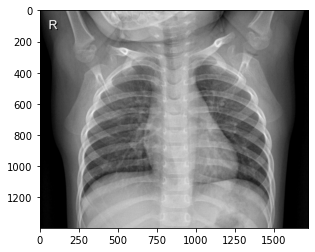

In [10]:
plt.imshow(img_N[0],cmap='gray')

On définit la fonction pour rendre toutes les images carrés :

In [11]:
def perfect_resize(img):
    x = np.shape(img)
    
    diff = np.abs(x[0] - x[1])
    a = int(diff/2)
    
    if(len(x) == 3):
        if (x[0] < x[1]):
            b = int(x[1]-(diff/2))
            #print(x)
            #print(a,b)
            res = img[:,a:b,:]
        else:
            b = int(x[0]-(diff/2))
            #print(x)
            #print(a,b)
            res = img[a:b,:,:]
    else:
        if (x[0] < x[1]):
            b = int(x[1]-(diff/2))
            #print(x)
            #print(a,b)
            res = img[:,a:b]
        else:
            b = int(x[0]-(diff/2))
            #print(x)
            #print(a,b)
            res = img[a:b,:]
        
    return res

On créer un ensemble des images carrés :

In [12]:
img_N_resize = []
for i in range(0,len(img_N)):
    img_N_resize.append(perfect_resize(img_N[i]))

img_P_resize = []
for i in range(0,len(img_P)):
    img_P_resize.append(perfect_resize(img_P[i]))

On test si tout a bien marché :

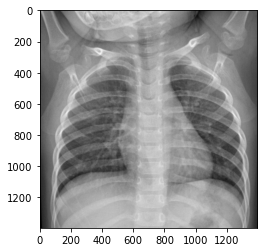

In [19]:
for i in range(0,len(img_N_resize)):
    img = img_N_resize[i]
    if(np.shape(img)[0] != np.shape(img)[1]):
        print(np.shape(img)[0],np.shape(img)[1])
        print("Erreur, des images ont mal été modifiés :" , i)
        
for i in range(0,len(img_P_resize)):
    img = img_P_resize[i]
    if(np.shape(img)[0] != np.shape(img)[1]):
        print(np.shape(img)[0],np.shape(img)[1])
        print("Erreur, des images ont mal été modifiés :" , i)
plt.imshow(img_N_resize[0],cmap='gray')

[[129 132 140 ... 132 131 135]
 [130 136 138 ... 134 132 138]
 [141 137 135 ... 139 137 138]
 ...
 [167 174 170 ... 171 169 175]
 [173 177 174 ... 173 171 174]
 [171 177 177 ... 172 173 171]]


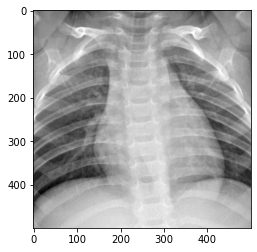

In [14]:
plt.gray()
img = img_N_resize[10]
#print(img,img.shape)
#img = Image.fromarray(img)
img = cv2.resize(img,(500, 500))
#img = Image.fromarray(img)
print(img)
plt.imshow(img)
#mpimg.imsave(fname = '/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Images/testA/'+'name.png', arr=img)
#print(img)
#print(img.shape)
#scipy.misc.imsave('outfile.jpg', image_array)

Maintenant on réduit les images en 500x500 :

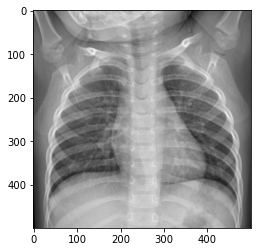

In [21]:
img = img_N_resize[0]
img = Image.fromarray(img)
img = img.resize(size=(500, 500))
plt.imshow(img)


In [16]:
img_N_reduction = []
for i in range(0,len(img_N_resize)):
    img_N_reduction.append(Image.fromarray(img_N_resize[i]).resize(size=(1000, 1000)))
    
img_P_reduction = []
for i in range(0,len(img_P_resize)):
    img_P_reduction.append(Image.fromarray(img_P_resize[i]).resize(size=(1000, 1000)))

TypeError: Cannot handle this data type: (1, 1, 4), <f4

On sauvegarde l'image :

In [17]:
for i in range(0,len(img_N_reduction)):
    if i < int(len(img_N_reduction)*0.2):
        mpimg.imsave(fname = '/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Prepross 1/testA/'+str(i)+'.jpg', arr=img_N_reduction[i])
    else:
        mpimg.imsave(fname = '/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Prepross 1/trainA/'+str(i)+'.jpg', arr=img_N_reduction[i])
print("Middle")    
for i in range(0,len(img_P_reduction)):
    if i < int(len(img_P_reduction)*0.2):
        mpimg.imsave(fname = '/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Prepross 1/testB/'+str(i)+'.jpg', arr=img_P_reduction[i])
    else:
        mpimg.imsave(fname = '/Users/guillaumebarthe/Desktop/Data and AI Master 1/Research Project Covid/Prepross 1/trainB/'+str(i)+'.jpg', arr=img_P_reduction[i])

Middle


In [18]:
img_N_reduction = []
for i in range(0,len(img_N_resize)):
    img_N_reduction.append((cv2.resize(img_N_resize[i],(500, 500))))
    
img_P_reduction = []
for i in range(0,len(img_P_resize)):
    img_P_reduction.append((cv2.resize(img_P_resize[i],(500, 500))))